<a href="https://colab.research.google.com/github/ariaghora/pascal-ml-class/blob/master/python/pertemuan_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
'''
Kolom: usia, pendapatan per tahun (ribu USD), spending score (1-100)
'''
dataset = np.loadtxt('mall_customers.csv', delimiter=',')

print(dataset[:10]) # 10 baris pertama

## Ekspolorasi data

- Clustering adalah gabungan antara matematik dan intuisi
- Perlu pula pemahaman domain terkait

In [ ]:
plt.scatter(dataset[:, 0], dataset[:, 1]) # usia vs pengeluaran tahunan
plt.show()

plt.scatter(dataset[:, 0], dataset[:, 2]) # usia vs spending score
plt.show()

plt.scatter(dataset[:, 1], dataset[:, 2]) # pengeluaran tahunan vs spending score
plt.show()

## K-Means Clustering

In [69]:
kmeans = KMeans(5)
kmeans.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
cluster_labels = kmeans.predict(dataset)

plt.scatter(dataset[:, 1], dataset[:, 2], c=cluster_labels)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2, 10):
    kmeans = KMeans(i)
    kmeans.fit(dataset)
    cluster_labels = kmeans.predict(dataset)
    score = silhouette_score(dataset, cluster_labels)
    print(score)



### Apakah silhouette score (kuantitas) menentukan bagus/tidaknya (kualitas) cluster?

Belum tentu ☺

Silhouette score (dan alat ukur lainnya) hanyalah salah satu metode untuk mencari parameter secara "heuristik".

### Kapan K-means gagal?

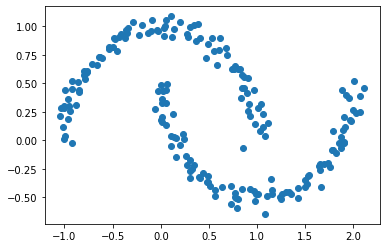

In [71]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=0.05)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

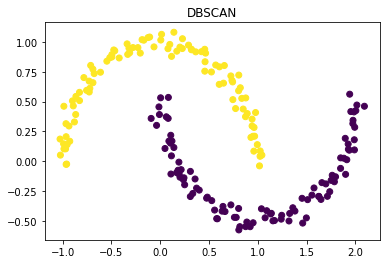

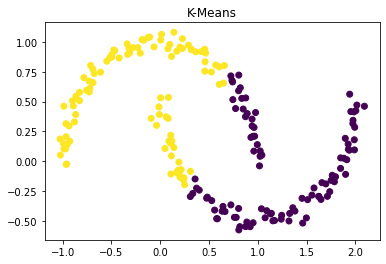

In [54]:
dbscan = DBSCAN(0.2)
kmeans = KMeans(2)

dbscan_labels = dbscan.fit_predict(X)
kmeans_labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title('DBSCAN')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.title('K-Means')
plt.show()

In [15]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=e20213011341ecb34c47f12515b70a6ed69a33c7530bd90c23ad21e385af0a42
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


# Association rule mining

In [81]:
from apyori import apriori

In [137]:
raw = [line.strip() for line in open('store_data.csv', 'r').readlines()]
transaksi = [line.split(',') for line in raw]

print('Jml baris transaksi: ', len(transaksi))
transaksi[:5]

Jml baris transaksi:  7501


[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

In [142]:
hasil = apriori(transaksi,
                min_support=0.005,
                min_confidence=0.2,
                min_lift=3.0,
                min_length=2)

rules = []
for relation_record in hasil:
    for relations in relation_record.ordered_statistics:
        rule = [set(relations.items_base), set(relations.items_add), relations.confidence, relations.lift]
        rules.append(rule)

mined_rules = pd.DataFrame(rules, columns=['Precedent (X)', 'Antecedent (Y)', 'Confidence', 'Lift'])

In [145]:
mined_rules.sort_values(by='Lift', ascending=False)

,Precedent (X),Antecedent (Y),Confidence,Lift
1,{pasta},{escalope},0.372881,4.700812
5,{pasta},{shrimp},0.322034,4.506672
4,{whole wheat pasta},{olive oil},0.271493,4.122410
16,"{herb & pepper, spaghetti}",{ground beef},0.393443,4.004360
15,"{mineral water, herb & pepper}",{ground beef},0.390625,3.975683
3,{tomato sauce},{ground beef},0.377358,3.840659
0,{mushroom cream sauce},{escalope},0.300699,3.790833
12,"{frozen vegetables, spaghetti}",{tomatoes},0.239234,3.498046
19,"{mineral water, soup}",{olive oil},0.225434,3.423030
13,"{tomatoes, spaghetti}",{frozen vegetables},0.318471,3.341054


7501